----
### *The 12th Computational Neuroscience Winter School*

# Tutorial I: Brain Inspired Computation - Advanced Part
----
__Date:__ Jan. 10, 2023

__Content Creator:__ Chongming Liu

# Tutorial Objectives

In this notebook, we'll learn the development of brain inspired computer vision, mainly about the convolutional neural network (CNN) and its variational forms. And at the last part of this section, we would also have a discussion on the future direction in terms of brain inspired computer vision.

1. Convolution and LeNet-5
1. AlexNet and visual system

---
# Setup

---

In [1]:
# Import most modules and functions needed
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import numpy as np
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelweight'] = 'bold'
import matplotlib.pyplot as plt
from PIL import Image

def setup_seed(seed):
    '''
    setting random seed
    '''
    
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.enabled = False
    torch.backends.cudnn.benchmark = False
    return

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

---
# Section 1: Convolution and LeNet-5

*Reference:* 

*Hubel, D.H., & Wiesel, T.N. (1962). Receptive fields, binocular interaction and functional architecture in the cat's visual cortex. The Journal of Physiology, 160.*

*Fukushima, K. (1980). Neocognitron: A self-organizing neural network model for a mechanism of pattern recognition unaffected by shift in position. Biological Cybernetics, 36, 193-202.*

*LeCun, Y., Jackel, L.D., Bottou, L., Cortes, C., Denker, J.S., Drucker, H., Subramanian, I., Muller, U., Sackinger, E., Simard, P.Y., & Vapnik, V.N. (1995). Learning algorithms for classification: A comparison on handwritten digit recognition.*

*LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-based learning applied to document recognition. Proc. IEEE, 86, 2278-2324.*

*LeCun, Y., & Cortes, C. (2005). The mnist database of handwritten digits.*

---

David H. Hubel and Torsten Wiesel first discovered there existed receptive fields, binocular interaction and functional architecture in the cat's visual cortex in 1962. Inspired by the receptive field, Fukushima brought out the operation "convolution" in the neocognitron in 1980. 

<img src="./imgs/Conv.gif" width="50%">

Then LeCun et al. combine the convolution with neural network and also with gradient-based learning algorithm and proposed the first convolutional neural network (CNN): LeNet. 

<img src="./imgs/LeNet.png" width="80%">

Important hyperparameters: number of channels, kernel size, padding, stride. 

100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


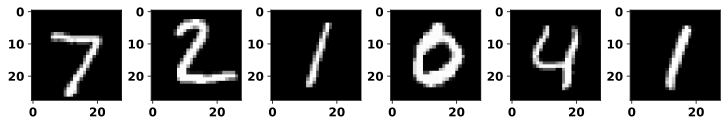

In [2]:
# LeNet-5 for training MNIST dataset  #Original resolution: 1*28*28
setup_seed(1)
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x)) # Size after this layer: ...
        out = F.max_pool2d(out, 2) # Size after this layer: ...
        out = F.relu(self.conv2(out)) # Size after this layer: ...
        out = F.max_pool2d(out, 2) # Size after this layer: ...
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out
    
    
train_dataset = torchvision.datasets.MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True)
valid_dataset = torchvision.datasets.MNIST(root='data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=10000)

model = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
test_accuracy = []
best_prec = 0

print(model)
for j, (input, target) in enumerate(valid_loader):
    input, target = input, target.long()
    
fig,ax=plt.subplots(1,6, layout="constrained", figsize=(10,18))
for i in range(6):
    ax[i].imshow(input[i,:,:,:].reshape(28,28), cmap = plt.cm.gray)

Epoch [1/1], Step [0/600], Loss: 2.30698, Train_Acc:6.00%
Accuary on test images:10.09%
Epoch [1/1], Step [20/600], Loss: 2.30846, Train_Acc:2.00%
Accuary on test images:10.94%
Epoch [1/1], Step [40/600], Loss: 2.27093, Train_Acc:19.00%
Accuary on test images:14.72%
Epoch [1/1], Step [60/600], Loss: 2.20071, Train_Acc:33.00%
Accuary on test images:33.44%
Epoch [1/1], Step [80/600], Loss: 1.67780, Train_Acc:36.00%
Accuary on test images:47.91%
Epoch [1/1], Step [100/600], Loss: 1.07881, Train_Acc:64.00%
Accuary on test images:54.32%
Epoch [1/1], Step [120/600], Loss: 1.64499, Train_Acc:46.00%
Accuary on test images:50.72%
Epoch [1/1], Step [140/600], Loss: 0.73712, Train_Acc:75.00%
Accuary on test images:71.52%
Epoch [1/1], Step [160/600], Loss: 0.70393, Train_Acc:77.00%
Accuary on test images:75.01%
Epoch [1/1], Step [180/600], Loss: 0.45907, Train_Acc:90.00%
Accuary on test images:89.48%
Epoch [1/1], Step [200/600], Loss: 0.36618, Train_Acc:85.00%
Accuary on test images:80.54%
Epoch [

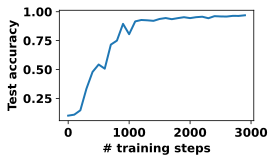

In [3]:
# Training process
for epoch in range(0, 1):
    
    model.train()
    # train for one epoch
    for i, (input, target) in enumerate(train_loader):
        train_total = 0
        train_correct = 0
        train_loss = 0
        # measure data loading time
        input, target = input, target.long()
                    
        
        # compute output
        output = model(input)
        loss = criterion(output, target)
        
        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()

        _, predicted = torch.max(output.data, 1)
        train_total += target.size(0)
        train_correct += (predicted == target).sum().item()
        prec = train_correct / train_total
        
        if (i) % 20 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.5f}, Train_Acc:{:.2f}%'.format(epoch+1, 1, i, len(train_loader), loss, prec*100))

            
            model.eval()
            valid_correct = 0
            valid_total = 0
            with torch.no_grad():
                total_loss = 0
                for j, (input, target) in enumerate(valid_loader):
                    input, target = input, target.long()
                    output = model(input)
                    
                    _, predicted = torch.max(output.data, 1)
                    valid_total = output.shape[0]
                    valid_correct = (predicted == target).sum().item()
                    loss = criterion(output, target)

        
                    prec = valid_correct / valid_total
                    print('Accuary on test images:{:.2f}%'.format(prec*100))
                    test_accuracy.append(prec)
                    best_prec = max(prec, best_prec)
                

print('Best accuracy is: {:.2f}%'.format(best_prec*100))
plt.figure(figsize=(3.5,2))
plt.plot(100*torch.arange(len(test_accuracy)), test_accuracy,linewidth=2)
plt.xlabel('# training steps')
plt.ylabel('Test accuracy')
plt.show()

---
# Section 2: AlexNet and visual system

*Reference:* 

*Krizhevsky, A., Sutskever, I., & Hinton, G.E. (2012). ImageNet classification with deep convolutional neural networks. Communications of the ACM, 60, 84 - 90.*

*Srivastava, N., Hinton, G.E., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: a simple way to prevent neural networks from overfitting. J. Mach. Learn. Res., 15, 1929-1958.*

Zeiler, M.D., & Fergus, R. (2013). Visualizing and Understanding Convolutional Networks. European Conference on Computer Vision.

*Schrimpf, M., Kubilius, J., Hong, H., Majaj, N.J., Rajalingham, R., Issa, E.B., Kar, K., Bashivan, P., Prescott-Roy, J., Schmidt, K., Yamins, D., & DiCarlo, J.J. (2018). Brain-Score: Which Artificial Neural Network for Object Recognition is most Brain-Like? bioRxiv.*

---

ImageNet Large-Scale Visual Recognition Challenge(ILSVRC) is the 'world cup' in computer vision. 

<img src="./imgs/ILSVRC.jpeg" width="50%">

In 2012, Hinton and his student Alex Krizhevsky brought out AlexNet and won the champion of ILSVRC at that year. Spotlight: ReLU activate function and dropout layer.

<img src="./imgs/alexnet.png" width="80%">

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\lee/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
95.3%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


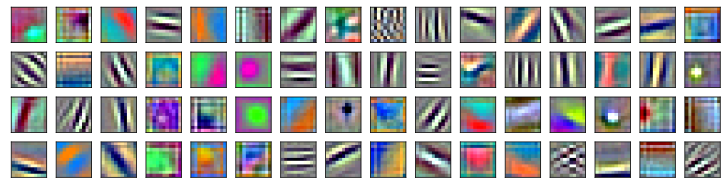

In [4]:
from torchvision.io import read_image
from torchvision.models import alexnet, AlexNet_Weights

# Initialize model with the best available weights
weights = AlexNet_Weights.DEFAULT
model = alexnet(weights=weights)

# Visualize the convolution kernel in the first layer
feature_image = model.state_dict()['features.0.weight'].clone()

fig,ax=plt.subplots(4,16, figsize=(10,2.5),constrained_layout=True)
for i in range(64):
    axi_x = int(i/16)
    axi_y = i-axi_x*16
    feature_image = model.state_dict()['features.0.weight'][i,:,:,:]
    feature_image-= feature_image.mean()
    feature_image/= feature_image.std ()
    feature_image*=  64
    feature_image+= 128
    kernel_show = np.clip(feature_image.numpy(),0,255).astype('uint8')
    ax[axi_x,axi_y].imshow(np.transpose((kernel_show),(1,2,0)))
    ax[axi_x,axi_y].set_xticks([])
    ax[axi_x,axi_y].set_yticks([])

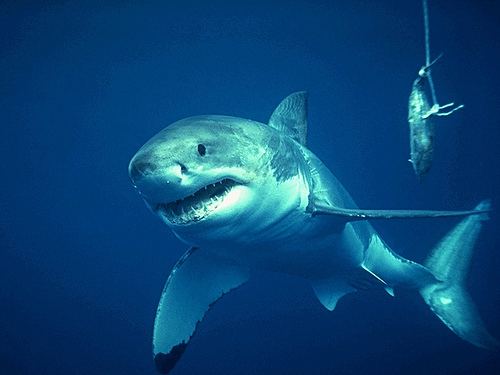

In [5]:
# Using AlexNet to do image classification
img = Image.open('./ImageNet_examples/shark.jpeg')
img

In [6]:
# Using AlexNet to do image classification
weights = AlexNet_Weights.DEFAULT
model = alexnet(weights=weights)
model.eval()
# Initialize the inference transforms
preprocess = weights.transforms()

# Apply inference preprocessing transforms
img = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(img).squeeze(0).softmax(0)
_,class_id = torch.sort(prediction,descending = True)
for i in range(5):
    category_name = weights.meta["categories"][class_id[i]]
    score = prediction[class_id[i]]
    print(f"{category_name}: {100 * score:.1f}%")

great white shark: 89.0%
tiger shark: 4.4%
hammerhead: 4.3%
loggerhead: 1.7%
electric ray: 0.1%


To know how the network recognize the target, Zeiler et al. (2013) proposed a method that we can visualize the gradient of a specific input with respect to the output at the position of corresponding label. Like given data(image) $(x_n, y_n)$, and let $o(x)$ stands for the output vector for an input data $x$. Then the gradient is:

$$grad(x_n) = \frac{\partial o_{y_n}(x_n)}{\partial x}$$

This gradient means the network focus on which part of this picture to do the classification.


RuntimeError: grad can be implicitly created only for scalar outputs

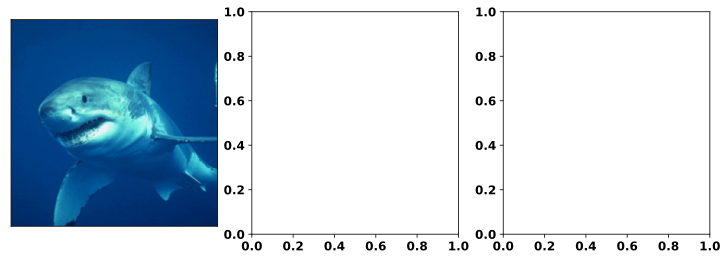

In [7]:
# How the network recognize the target?
def gradient(img, target_class):
    '''
    Return the gradient matrix of 
    '''
    img.requires_grad = True
    # Computer the output and gradient
    output = model(img).reshape(1000)[...]
    output.backward()
    return np.transpose((img.grad.data.squeeze(0).numpy()),(1,2,0))


def transform(rgb_matrix):
    '''
    Return a linear transform of the origin matrix that all elements belong to [0,1].
    '''
    min_matrix = np.min(rgb_matrix)
    matrix = rgb_matrix - min_matrix
    matrix = matrix/np.max(matrix)
    return matrix

target_class = class_id[0]

fig,ax=plt.subplots(1,3, figsize=(10,3.5),constrained_layout=True)
ax[0].imshow(transform(np.transpose((img.squeeze(0).numpy()),(1,2,0))))
ax[0].set_xticks([])
ax[0].set_yticks([])

gradient = transform(gradient(img,target_class))
#denosing
#gradient[gradient<np.max(gradient)/2.5] = 0

ax[1].imshow(gradient)
ax[1].set_xticks([])
ax[1].set_yticks([])

img = Image.open('./ImageNet_examples/shark.jpeg')
img = preprocess(img).unsqueeze(0)
ax[2].imshow(transform(gradient*10+transform(np.transpose((img.squeeze(0).numpy()),(1,2,0)))))
ax[2].set_xticks([])
ax[2].set_yticks([])


The way of how CNN doing object recognition are very similar to how visual system is doing.

<img src="./imgs/brainscore.png" width="80%">

---
# Summary

- In this tutorial, we learned the basic operation of convolution and then construct two different convolutional neural networks (CNN)- LeNet-5 and AlexNet, and then we use them to do MNIST and ImageNet classification, respectively.
- LeNet-5 is the first convolutional neural network that was widely used in many object recognition tasks, it is the basic of the modern framework of CNNs.
- AlexNet is the first 'deep' convolutional neural network, and won the ILSVRC in 2012. It is a brain-inspired net in the sense of using dropout layer, ReLU activation function and so on. Moreover, we find that it can natually perform like the visual system in the brain. And also with the brain-score we can conclude that if we want to reach high-performance like human, we must consider more about the properties in the visual system.


---